leetcode 695 岛屿的最大面积

In [1]:
# 通过dfs递归来实现

from typing import List

class Solution:
    def dfs(self, grid, cur_i, cur_j):
        if cur_i < 0 or cur_j < 0 or cur_i == len(grid) or cur_j == len(grid[0]) or grid[cur_i][cur_j] != 1:
            return 0
        grid[cur_i][cur_j] = 0

        ans = 1
        for di, dj in [[0, 1], [0, -1], [1, 0], [-1, 0]]:
            next_i, next_j = cur_i + di, cur_j + dj
            ans += self.dfs(grid, next_i, next_j)
        return ans

    def maxAreaOfIsland(self, grid:List[List[int]]) -> int:
        ans = 0
        for i, l in enumerate(grid):
            for j, n in enumerate(l):
                ans = max(self.dfs(grid, i, j), ans)  # 递归的思想，当前这个元素是陆地的时候，将这块陆地的四周递归进行dfs
        return ans
   


In [2]:
# 通过 dfs + 栈 来实现
from typing import List

class Solution:
    def maxAreaOfIsland(self, grid:List[List[int]]) -> int:
        ans = 0
        length = len(grid)
        width = len(grid[0])
        for i, l in enumerate(grid):
            for j, n in enumerate(l):
                cur = 0
                stack = [(i, j)] # 栈是为了遇到陆地的时候使用的
                while stack:  # 栈不为空
                    cur_i, cur_j = stack.pop() #出栈
                    if cur_i < 0 or cur_j < 0 or cur_i == len(grid) or cur_j == len(grid[0]) or grid[cur_i][cur_j] != 1:
                        continue
                    grid[cur_i][cur_j] = 0   # 当前值为1, 是陆地 改为0， ++
                    cur += 1  
                    for di, dj in [[0, 1], [0, -1], [-1, 0], [1, 0]]: # 以当前这块陆地为开始，向四周移动，入栈，将当前块的四周四个位置的元素
                                                                        # 都入栈，然后循环栈不为空
                        next_i, next_j = cur_i + di, cur_j + dj
                        stack.append((next_i, next_j)) 
                ans = max(ans, cur)
        return ans

In [4]:
# 通过 bfs + 队列 来实现

from collections import deque
from typing import List

class solution:
    def  maxAreaOfIsland(self, grid:List[List[int]]) -> int:
        ans = 0
        for i, l in enumerate(grid):
            for j, n in enumerate(l):
                cur = 0
                q = deque([(i, j)])
                while q:
                    cur_i, cur_j = q.popleft()
                    if cur_i < 0 or cur_j < 0 or cur_i == len(grid) or cur_j == len(grid[0]) or grid[cur_i][cur_j] != 1:
                        continue
                    cur += 1
                    grid[cur_i][cur_j] = 0
                    for di, dj in [[1, 0], [-1, 0], [0, 1], [0, -1]]:
                        next_i, next_j = cur_i + di, cur_j + dj
                        q.append((next_i, next_j))
                ans = max(ans ,cur)

        return ans

leetcode 200 岛屿数量

In [35]:
# 通过判断dfs的返回值是否为0， 如果返回值不为0，说明有一块陆地 sum + 1

from typing import List

class Solution:
    def dfs(self, grid, cur_i, cur_j):
        if cur_i < 0 or cur_j < 0 or cur_i == len(grid) or cur_j == len(grid[0]) or grid[cur_i][cur_j] != '1':
            return 0
        grid[cur_i][cur_j] = 0

        ans = 1
        for di, dj in [[0, 1], [0, -1], [1, 0], [-1, 0]]:
            next_i, next_j = cur_i + di, cur_j + dj
            ans += self.dfs(grid, next_i, next_j)
        return ans

    def numIslands(self, grid:List[List[str]]) -> int:
        sum = 0
        for i, l in enumerate(grid):
            for j, n in enumerate(l):
                ans = 0
                ans = self.dfs(grid, i, j)
                if ans > 0 :
                    sum += 1
        return sum

solution = Solution()
grid = [["1","1","0","0","0"],["1","1","0","0","0"],["0","0","1","0","0"],["0","0","0","1","1"]]
solution.numIslands(grid)

3

In [44]:
from typing import List

class Solution:
    def dfs(self, grid, cur_i, cur_j):
        grid[cur_i][cur_j] = 0
        nr, nc = len(grid), len(grid[0])
        for next_i, next_j in [(cur_i - 1, cur_j), (cur_i + 1, cur_j), (cur_i, cur_j - 1), (cur_i, cur_j + 1)]:
            if 0 <= next_i < nr and 0 <= next_j < nc and grid[next_i][next_j] == "1":
                self.dfs(grid, next_i, next_j)

    def numIslands(self, grid: List[List[str]]) -> int:
        nr = len(grid)
        if nr == 0:
            return 0
        nc = len(grid[0])

        num_islands = 0
        for i in range(nr):
            for j in range(nc):
                if grid[i][j] == "1":
                    num_islands += 1
                    self.dfs(grid, i, j)
        
        return num_islands

solution = Solution()
grid = [["1","1","0","0","0"],["1","1","0","0","0"],["0","0","1","0","0"],["0","0","0","1","1"]]
solution.numIslands(grid)

3

In [51]:
# 并查集
# 使用并查集代替搜索，为了求出岛屿的数量，扫描整个网格，如果一个位置为1，则将其与相邻四个方向上的1在并查集中进行合并
# 最终岛屿的数量就是并查集中连通分量的数目

from typing import List

class UnionFind:
    def __init__(self, grid):
        m, n = len(grid), len(grid[0])
        self.count = 0
        self.parent = [-1] * (m * n)
        self.rank = [0] * (m * n)
        for i in range(m):
            for j in range(n):
                if grid[i][j] == "1":
                    self.parent[i * n + j] = i * n + j # 标记为1的位置
                    self.count += 1  # 二位数组中有多少个为1的数量
    
    # 找到节点i的祖宗 ，递归版本
    def find(self, i):
        if self.parent[i] != i:
            self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    # # 非递归版本
    # def find_while(self, i):
    #     while(self.parent[i] != i):
    #         self.parent[i] = self.parent[self.parent[i]]
    #         i = self.parent[i]
    #     return i


    # 合并。先找到x的集合号a, y的集合号b, 如果a, b相等则无需合并, 若a, b不相等
    # 则将a的集合号修改为b, 或者将b的集合号修改为a, 只需要修改祖宗就行
    def union(self, x, y):
        rootx = self.find(x)
        rooty = self.find(y)
        # root小的指向root大的
        if rootx != rooty:
            if self.rank[rootx] < self.rank[rooty]:
                rootx, rooty = rooty, rootx
            self.parent[rooty] = rootx
            if self.rank[rootx] == self.rank[rooty]:
                self.rank[rootx] += 1
            self.count -= 1

    def getCount(self):
        return self.count


class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        nr = len(grid)
        if nr == 0:
            return 0
        nc = len(grid[0])

        uf = UnionFind(grid)
        for cur_i in range(nr):
            for cur_j in range(nc):
                if grid[cur_i][cur_j] == '1':  # 当前的这个点是陆地，和思边进行union合并
                    grid[cur_i][cur_j] = '0'
                    for next_i, next_j in [(cur_i - 1, cur_j), (cur_i + 1, cur_j), (cur_i, cur_j - 1), (cur_i, cur_j + 1)]:
                        if 0 <= next_i < nr and 0 <= next_j < nc and grid[next_i][next_j] == '1':
                            uf.union(cur_i * nc + cur_j, next_i * nc + next_j)
        return uf.getCount()

solution = Solution()
grid = [["1","1","0","0","0"],["1","1","0","0","0"],["0","0","1","0","0"],["0","0","0","1","1"]]
solution.numIslands(grid)


3

leetcode 547 省份数量

有 n 个城市，其中一些彼此相连，另一些没有相连。如果城市 a 与城市 b 直接相连，且城市 b 与城市 c 直接相连，那么城市 a 与城市 c 间接相连。

省份 是一组直接或间接相连的城市，组内不含其他没有相连的城市。

给你一个 n x n 的矩阵 isConnected ，其中 isConnected[i][j] = 1 表示第 i 个城市和第 j 个城市直接相连，而 isConnected[i][j] = 0 表示二者不直接相连。

返回矩阵中 省份 的数量。

输入：isConnected = [[1,1,0],[1,1,0],[0,0,1]]
输出：2

In [22]:
from typing import List

class Solution:
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        def find(index: int) -> int:
            if parent[index] != index:
                parent[index] = find(parent[index])
            return parent[index]
        
        def union(index1: int, index2: int):
            parent[find(index1)] = find(index2)

        
        cities = len(isConnected)
        parent = list(range(cities))

        for i in range(cities):
            for j in range(i + 1, cities):
                if isConnected[i][j] == 1:
                    # isConnected==1的时候，这两个节点一定有关系，进行合并
                    union(i, j)
        
        provinces = sum(parent[i] == i for i in range(cities))
        return provinces
        
solution = Solution()
isConnected = [[1,0,0,1],[0,1,1,0],[0,1,1,1],[1,0,1,1]]  # 应该是1 输出是4 
solution.findCircleNum(isConnected)


1

In [37]:
class Solution:
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        def dfs(i: int):
            for j in range(cities):
                if isConnected[i][j] == 1 and j not in visited:
                    visited.add(j)
                    dfs(j)

        cities = len(isConnected)
        visited = set()
        province = 0

        for i in range(cities):
            if i not in visited:
                dfs(i)
                province += 1
        return province

solution = Solution()
isConnected = [[1,0,0,1],[0,1,1,0],[0,1,1,1],[1,0,1,1]]  # 应该是1 输出是4 
solution.findCircleNum(isConnected)

1

In [38]:
from collections import deque

class Solution:
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        cities = len(isConnected)
        visited = set()
        provinces = 0

        for i in range(cities):
            if i not in visited:
                Q = deque([i])
                while Q:
                    j = Q.popleft()
                    visited.add(j)
                    for k in range(cities):
                        if isConnected[j][k] == 1 and k not in visited:
                            Q.append(k)
                provinces += 1

        return provinces

4

leetcode 104 二叉树的最大深度

In [2]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
from typing import Optional


class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        if root is None:
            return 0
        else:
            lh = self.maxDepth(root.left)
            rh = self.maxDepth(root.right)
            return max(lh, rh) + 1 

leetcode 2091 从数组中移除最大值和最小值

给你一个下标从 0 开始的数组 nums ，数组由若干 互不相同 的整数组成。

nums 中有一个值最小的元素和一个值最大的元素。分别称为 最小值 和 最大值 。你的目标是从数组中移除这两个元素。

一次 删除 操作定义为从数组的 前面 移除一个元素或从数组的 后面 移除一个元素。

返回将数组中最小值和最大值 都 移除需要的最小删除次数。

 

示例 1：

输入：nums = [2,10,7,5,4,1,8,6]
输出：5
解释：
数组中的最小元素是 nums[5] ，值为 1 。
数组中的最大元素是 nums[1] ，值为 10 。
将最大值和最小值都移除需要从数组前面移除 2 个元素，从数组后面移除 3 个元素。
结果是 2 + 3 = 5 ，这是所有可能情况中的最小删除次数。
示例 2：

输入：nums = [0,-4,19,1,8,-2,-3,5]
输出：3
解释：
数组中的最小元素是 nums[1] ，值为 -4 。
数组中的最大元素是 nums[2] ，值为 19 。
将最大值和最小值都移除需要从数组前面移除 3 个元素。
结果是 3 ，这是所有可能情况中的最小删除次数。


In [55]:

class Solution:
    def minimumDeletions(self, nums: List[int]) -> int:
        if len(nums) == 1:
            return 1

        min_index = 0
        max_index = 0

        for i in range(len(nums)):
            if nums[i] < nums[min_index]:
                min_index = i
            if nums[i] > nums[max_index]:
                max_index = i

        max_1 = max(min_index, max_index)
        min_1 = min(min_index, max_index)

        return min(min_1 + 1 + len(nums) - max_1, min(max_1 + 1, len(nums) - min_1))

solution = Solution()
nums = [-87,60,-30,-67,74,55,76,-53]
solution.minimumDeletions(nums)


3

leetcode 88 合并两个有序数组

输入：nums1 = [1,2,3,0,0,0], m = 3, nums2 = [2,5,6], n = 3
输出：[1,2,2,3,5,6]
解释：需要合并 [1,2,3] 和 [2,5,6] 。
合并结果是 [1,2,2,3,5,6] ，其中斜体加粗标注的为 nums1 中的元素。

In [43]:
# 逆向双指针

from typing import List

class Solution:
    def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        p1 = m - 1
        p2 = n - 1
        p = m + n - 1
        while p1 >= 0 or p2 >=0 :
            if p1 == -1:
                nums1[p] = nums2[p2]
                p2 -=1
            elif p2 == -1:
                nums1[p] = nums2[p1]
                p1 -=1
            elif nums1[p1] > nums2[p2]:
                nums1[p] = nums1[p1]
                p1 -= 1
            elif nums1[p1] <= nums1[p2]:
                nums1[p] = nums1[p2]
                p2 -=1
            p -=1
        return nums1

# solution = Solution()
# nums1 = [1,2,3,0,0,0] 
# m = 3
# nums2 = [2,5,6]
# n = 3
# solution.merge(nums1, m, nums2, n)

leetcode 90 子集 (未解决)

In [64]:
class Solution:
    def subsetsWithDup(self, nums: List[int]) -> List[List[int]]:
        pass    

leetcode 136 只出现一次的数字 I

In [70]:
from functools import reduce


class Solution:
    def singleNumber(self, nums: List[int]) -> int:
        # num = nums[0]
        # for i in range(1, len(nums)):
        #     num = num^nums[i]
        # return num

        return reduce(lambda x, y: x ^ y, nums)

solution = Solution()
solution.singleNumber([4,1,2,1,2])

4

leetcode 137 只出现一次的数字 II

只有一个数字出现一次，别的都出现三次


思路与算法

为了方便叙述，我们称「只出现了一次的元素」为「答案」。

由于数组中的元素都在 int\texttt{int}int（即 323232 位整数）范围内，因此我们可以依次计算答案的每一个二进制位是 000 还是 111。

具体地，考虑答案的第 iii 个二进制位（iii 从 000 开始编号），它可能为 000 或 111。对于数组中非答案的元素，每一个元素都出现了 333 次，对应着第 iii 个二进制位的 333 个 000 或 333 个 111，无论是哪一种情况，它们的和都是 333 的倍数（即和为 000 或 333）。因此：

答案的第 iii 个二进制位就是数组中所有元素的第 iii 个二进制位之和除以 333 的余数。

这样一来，对于数组中的每一个元素 xxx，我们使用位运算 (x >> i) & 1\texttt{(x >> i) \& 1}(x >> i) & 1 得到 xxx 的第 iii 个二进制位，并将它们相加再对 333 取余，得到的结果一定为 000 或 111，即为答案的第 iii 个二进制位。

In [102]:
from typing import List

class Solution:
    def singleNumber(self, nums: List[int]) -> int:
        ans = 0
        for i in range(32):
            total = sum((num >> i) & 1 for num in nums)
            if total % 3:
                if i == 31:
                    ans -= (1<<i)
                else:
                    ans |= (1<<i)
        return ans
solution = Solution()
nums = [0,1,0,1,0,1,99]
solution.singleNumber(nums)

# (sum >> i) & 1 取出num的每一位的二进制数

99

In [43]:
class Solution:
    def minBitFlips(self, start: int, goal: int) -> int:
        start = bin(start)[2:]
        goal = bin(goal)[2:]

        if len(start) > len(goal):
            goal = '0' * (len(start) - len(goal)) + goal
        else:
            start = '0' * (len(goal) - len(start)) + start
                     
        sum = 0
        for i in range(len(start)):
            if start[i] != goal[i]:
                sum += 1
        return sum

solution = Solution()
solution.minBitFlips(start = 3, goal = 4)     

3

In [33]:
# 最大连续子串

class Solution:
    def maxPower(self, s: str) -> int:
        ans, cnt = 1, 1
        for i in range(1, len(s)):
            if s[i] == s[i - 1]:
                cnt += 1
                ans = max(ans, cnt)
            else:
                cnt = 1
        return ans

'0b100'

leetcode 2195 向数组中追加 K 个整数

给你一个整数数组 nums 和一个整数 k 。请你向 nums 中追加 k 个 未 出现在 nums 中的、互不相同 的 正 整数，并使结果数组的元素和 最小 。

返回追加到 nums 中的 k 个整数之和。

 

示例 1：

输入：nums = [1,4,25,10,25], k = 2
输出：5
解释：在该解法中，向数组中追加的两个互不相同且未出现的正整数是 2 和 3 。
nums 最终元素和为 1 + 4 + 25 + 10 + 25 + 2 + 3 = 70 ，这是所有情况中的最小值。
所以追加到数组中的两个整数之和是 2 + 3 = 5 ，所以返回 5 。
示例 2：

输入：nums = [5,6], k = 6
输出：25
解释：在该解法中，向数组中追加的两个互不相同且未出现的正整数是 1 、2 、3 、4 、7 和 8 。
nums 最终元素和为 5 + 6 + 1 + 2 + 3 + 4 + 7 + 8 = 36 ，这是所有情况中的最小值。
所以追加到数组中的两个整数之和是 1 + 2 + 3 + 4 + 7 + 8 = 25 ，所以返回 25 。

In [55]:
# ps: 我写的超时了

from typing import List

class Solution:
    def minimalKSum(self, nums: List[int], k: int) -> int:
        max_num = max(nums)
        lis = [0] * (max_num + k)
        for num in nums:
            lis[num - 1] = 1
        result = 0
        count = 0
        for i in range(0, len(lis)):
            if lis[i] == 0:
                count += 1
                result += (i + 1)
            if count == k:
                break       
        return result
solution = Solution()
solution.minimalKSum(nums = [23767857,21565918,85047221,44602805,11800671,35095294,970673,88859293,73171470,37153084,87889470,72219057,79109884,38623962,62878542,58062287,99994523,3107671], 
k = 970673)



# class Solution:
#     def minimalKSum(self, nums: List[int], k: int) -> int:
#         nums.extend([0, int(2e9) + 1])
#         nums.sort()

#         presum = 0
#         ans = 0
#         for i in range(1, len(nums)):
#             offer = nums[i] - nums[i - 1] - 1
#             if offer > 0:
#                 if offer < k:
#                     k -= offer
#                 else:
#                     ans = (nums[i - 1] + k + 1) * (nums[i - 1] + k) // 2 - presum
#                     break
#             if nums[i] != nums[i - 1]:
#                 presum += nums[i]
        
#         return ans

471103521802

In [90]:
class Solution:
    def trailingZeroes(self, n: int) -> int:
        ans = 0
        for i in range(5, n+1, 5):
            while i % 5 == 0:
                i //= 5
                ans +=1
        return ans
        

solution = Solution()
solution.trailingZeroes(50)

12

In [85]:
40 //5

8

In [83]:
from functools import reduce

n = 60
reduce(lambda x,y: x*y, range(1, n+1))

8320987112741390144276341183223364380754172606361245952449277696409600000000000000

In [ ]:
# 最小栈

class MinStack:

    def __init__(self):
        self.lis = []


    def push(self, val: int) -> None:
        self.lis.append(int)


    def pop(self) -> None:
        if len(self.lis) <= 1:
            return None
        self.lis.pop()


    def top(self) -> int:
        if len(self.lis) <= 0:
            return None
        return self.lis[-1] 


    def getMin(self) -> int:
        if len(self.lis) <= 0:
            return None
        self.lis.sort()
        return self.lis[0]




# Your MinStack object will be instantiated and called as such:
# obj = MinStack()
# obj.push(val)
# obj.pop()
# param_3 = obj.top()
# param_4 = obj.getMin()

leetcode91 解码问题

一条包含字母 A-Z 的消息通过以下映射进行了 编码 ：

'A' -> "1"
'B' -> "2"
...
'Z' -> "26"
要 解码 已编码的消息，所有数字必须基于上述映射的方法，反向映射回字母（可能有多种方法）。例如，"11106" 可以映射为：

"AAJF" ，将消息分组为 (1 1 10 6)
"KJF" ，将消息分组为 (11 10 6)
注意，消息不能分组为  (1 11 06) ，因为 "06" 不能映射为 "F" ，这是由于 "6" 和 "06" 在映射中并不等价。

给你一个只含数字的 非空 字符串 s ，请计算并返回 解码 方法的 总数 。

题目数据保证答案肯定是一个 32 位 的整数。

 

示例 1：

输入：s = "12"
输出：2
解释：它可以解码为 "AB"（1 2）或者 "L"（12）。
示例 2：

输入：s = "226"
输出：3
解释：它可以解码为 "BZ" (2 26), "VF" (22 6), 或者 "BBF" (2 2 6) 。
示例 3：

输入：s = "0"
输出：0
解释：没有字符映射到以 0 开头的数字。
含有 0 的有效映射是 'J' -> "10" 和 'T'-> "20" 。
由于没有字符，因此没有有效的方法对此进行解码，因为所有数字都需要映射。

问题分析:
    滑动窗口问题，窗口大小为1或者为2的随机滑动

In [34]:
import pandas as pd
results = []
with open("/Users/damon/IdeaProjects/gmall-flink/gmall-realtime/src/main/java/com/gmall-kafka-python/ch4_wlg_surface-flask_1_ccgg_month.txt") as f:
    for i in range(86):
        next(f)
    for line in f.readlines():
        lines = line.split(' ')
        result = []
        for line in lines:
            if line != '':
                result.append(line)
        result[-1] = result[-1].strip()
        results.append(result)

names = ['site',  'year', 'month', 'value']
result = pd.DataFrame(results, columns=names)
result
        

,site,year,month,value
0,WLG,1991,5,1791.03
1,WLG,1991,6,1793.68
2,WLG,1991,7,1779.95
3,WLG,1991,8,1774.45
4,WLG,1991,9,1783.97
...,...,...,...,...
351,WLG,2020,8,1952.53
352,WLG,2020,9,1966.39
353,WLG,2020,10,1969.68
354,WLG,2020,11,1955.32


In [17]:
import pandas as pd
names = ['site', 'year', 'month', 'value']
data = pd.read_csv("/Users/damon/IdeaProjects/gmall-flink/gmall-realtime/src/main/java/com/gmall-kafka-python/ch4_wlg_surface-flask_1_ccgg_month.txt", sep='\t', skiprows=86, names=names)

data



,site,year,month,value
0,WLG 1991 5 1791.03,NaN,NaN,NaN
1,WLG 1991 6 1793.68,NaN,NaN,NaN
2,WLG 1991 7 1779.95,NaN,NaN,NaN
3,WLG 1991 8 1774.45,NaN,NaN,NaN
4,WLG 1991 9 1783.97,NaN,NaN,NaN
...,...,...,...,...
351,WLG 2020 8 1952.53,NaN,NaN,NaN
352,WLG 2020 9 1966.39,NaN,NaN,NaN
353,WLG 2020 10 1969.68,NaN,NaN,NaN
354,WLG 2020 11 1955.32,NaN,NaN,NaN


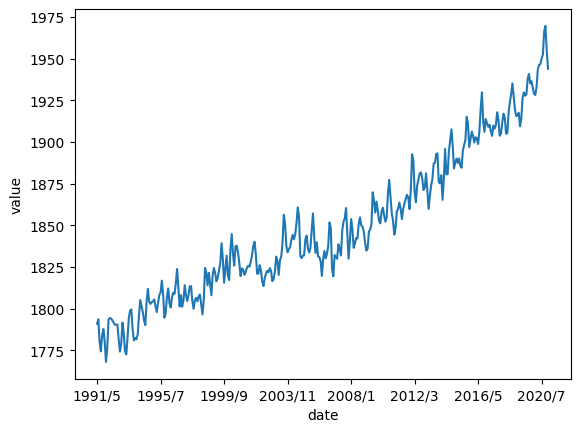

<Figure size 640x480 with 0 Axes>

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

names = ['site', 'year', 'month', 'value']
df = pd.read_csv(r"111.txt", names=names)
df['date'] = df['year'].map(str) + "/" + df['month'].map(str)


fig, ax = plt.subplots()
plt.plot(df['date'].values, df['value'].values)
plt.xlabel('date')
plt.ylabel('value')
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))
plt.show()
plt.savefig("curve.svg", dpi=300,format="svg")
